# Import Libraries

In [10]:
import zipfile # to handle zip files
import os # to interact with operating systems
import pandas as pd # to manipulate dataframes
import matplotlib.pyplot as plt # visualization with matplotlib
import seaborn as sns # visualization with seaborn

# Read Dataset

In [15]:
# Unzipping the netflix dataset
with zipfile.ZipFile('NetflixData.zip', 'r') as zip_ref:
    zip_ref.extractall('Netflix_Data')

# Rename as 'Netflix_shows_movies'
os.rename('Netflix_Data', 'Netflix_shows_movies_')

# load dataset into a dataframe called 'nd'
nd = pd.read_csv('Netflix_shows_movies_/netflix_data.csv')

In [16]:
# read top 5 rows
nd.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [20]:
# check the number of rows and columns
print('The netflix dataset has {} Rows and {} Columns'.format(nd.shape[0], nd.shape[1]))

The netflix dataset has 6234 Rows and 12 Columns


In [21]:
# check the data types of the columns
nd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


* Dataset contains two (2) integer and ten (10) object data types

In [22]:
# Check for missing values
nd.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

# Data Cleaning

* Handling Missing Values

In [23]:
# function to treat missing values
def fill_missing_with_mode(nd, columns):
    """
    Fills object missing values with mode.

    Parameters:
        nd (pd.DataFrame): The DataFrame to process.
        columns (list): List of column names to treat missing values.

    Returns:
        pd.DataFrame: The DataFrame with missing values filled.
    """
    for column in columns:
        if column in nd.columns and nd[column].dtype == 'object':
            mode_value = nd[column].mode()[0]  # Get the mode of the column
            nd[column].fillna(mode_value, inplace=True)
    return nd

# Usage
missing_columns = ['country', 'date_added', 'rating', 'director', 'cast']
nd = fill_missing_with_mode(nd, missing_columns)

In [24]:
nd.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Data Exploration

* Data description
* Statistical analysis

In [25]:
# Describe the numeric data types
nd.describe().T

count          mean           std       min          25%  \
show_id       6234.0  7.670368e+07  1.094296e+07  247747.0  80035801.75   
release_year  6234.0  2.013359e+03  8.811620e+00    1925.0      2013.00   

                     50%          75%         max  
show_id       80163367.0  80244888.75  81235729.0  
release_year      2016.0      2018.00      2020.0

In [26]:
# Describe the object data types
nd.describe(include='object').T

count unique                                                top  \
type         6234      2                                              Movie   
title        6234   6172                                        The Silence   
director     6234   3301                             Raúl Campos, Jan Suter   
cast         6234   5469                                 David Attenborough   
country      6234    554                                      United States   
date_added   6234   1524                                    January 1, 2020   
rating       6234     14                                              TV-MA   
duration     6234    201                                           1 Season   
listed_in    6234    461                                      Documentaries   
description  6234   6226  A surly septuagenarian gets another chance at ...   

             freq  
type         4265  
title           3  
director     1987  
cast          588  
country      2508  
date_added    133  
rating       2037  
duration     1321  
listed_in     299  
description     3

* Most movies are listed as documentaries
* Mostly rated as TV-MA

In [29]:
# Distribution of ratings
print("Unique ratings:\n", nd['rating'].value_counts())

Unique ratings:
 TV-MA       2037
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64


* NC-17 movie ratings is the lowest

In [30]:
# Number of movies vs. TV shows
type_counts = nd['type'].value_counts()
print("\nType distribution:\n", type_counts)


Type distribution:
 Movie      4265
TV Show    1969
Name: type, dtype: int64


* There are twice as much movies as TV shows in the netflix dataset

In [31]:
# Average duration of movies
movies_dur = nd[nd['type'] == 'Movie']['duration'].str.replace(' min', '').astype(int) # remove suffix from movie duration, convert data type to integer
av_movie_dur = movies_dur.mean()
print("Average Duration of Netflix Movies (in minutes):", av_movie_dur)

Average Duration of Netflix Movies (in minutes): 99.10082063305978


# Data Visualization

* Visualize the most-watched genres.
* Display the ratings distribution for the movies

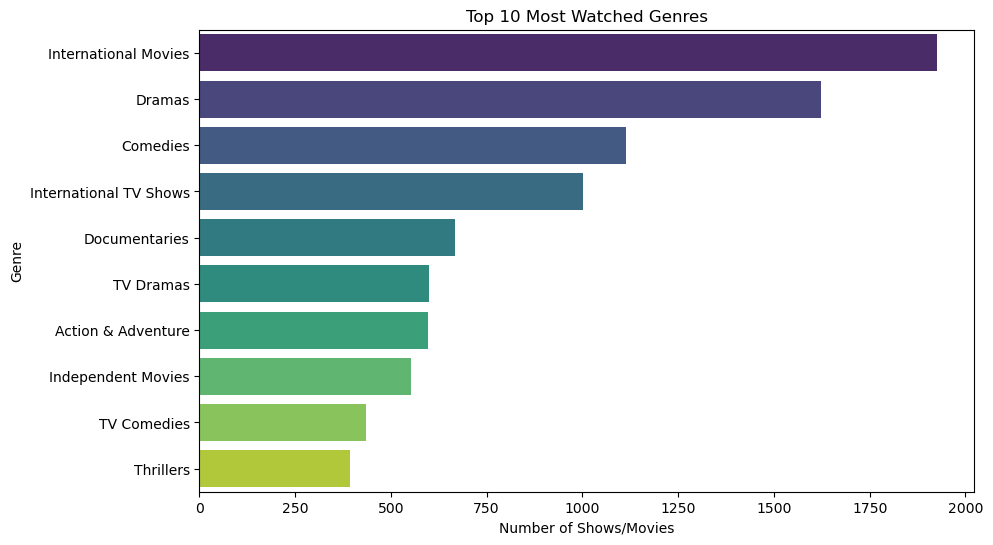

In [34]:
# Most watched genres
plt.figure(figsize=(10, 6)) # defines plot size
genre_counts = nd['listed_in'].str.split(', ').explode().value_counts().head(10) # explodes combined listed movies into separate rows and selects top 10
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')  # defines plot properties, axis, colours etc
plt.title("Top 10 Most Watched Genres") # gives the plot 'Top 10 Most Watched' Genres title
plt.xlabel("Number of Shows/Movies")  # lables x-axis Number of Shows/Movies
plt.ylabel("Genre")  # labels y-axis as Genre
plt.show()  # displays visual

* International movies, Drama and Comedies are the top most watched movies and TV shows

In [38]:
# Ratings distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=nd, x='rating', order=nd['rating'].value_counts().index, palette='viridis') # defines plot properties, axis, colours etc
plt.title("Ratings Distribution") # gives the plot Ratings Distribution title
plt.xlabel("Rating")  # lables y-axis as Rating
plt.ylabel("Count")  # labels x-axis as Count
plt.xticks(rotation=45) # rotate x-axis label by 45 degrees
plt.show() # displays visual

* TV-MA, TV-14 and TV-PG are the top 3 most rated movies/tv shows on netflix